# EDA on Breast Cancer Survival Dataset:


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [65]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [66]:
dataframe = pd.read_csv("/content/gdrive/MyDrive/Artificial intelligence /cancer_survival_dataset.csv")
dataframe.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [67]:
# shape, features of the dataset
print("Shape of the dataset = {shape}".format(shape = dataframe.shape))
print("Features of the dataset = {features}".format(features = dataframe.columns))
print("Value counts : \n{ValueCounts}".format(ValueCounts = dataframe['status'].value_counts()))

Shape of the dataset = (306, 4)
Features of the dataset = Index(['age', 'year', 'nodes', 'status'], dtype='object')
Value counts : 
status
1    225
2     81
Name: count, dtype: int64


#### Some observations from the above result
1. The dataset has 306 rows and 4 features of which 3 are independent and 1 is independent.
2. The 3 independent features are age, year and nodes and a dependent feature is status.
3. From Kaggle website these features descriptions are,
  * age ---> age of the person at the time of operation,
  * year ---> Year at which operation has been done,
  * nodes ---> number of auxillary lymph nodes the patient has,
  * status ---> 1 indicates the person is survived more than or equal to 5 years after the cancer. 2 indicates person died within 5 years after the operation.
4. To have better understanding of auxillary lymph nodes, I have gone throught the content specified in the website [medicalnewstoday](https://www.medicalnewstoday.com/articles/319713)
5. Against target status 1, the number of rows present are 225 and against status 2, the number of rows present are 81. From this we can colclude that, the dataset is imbalanced towards status 1.

### Univariate analysis(PDF, CDF, Boxplot, Voilin plots)

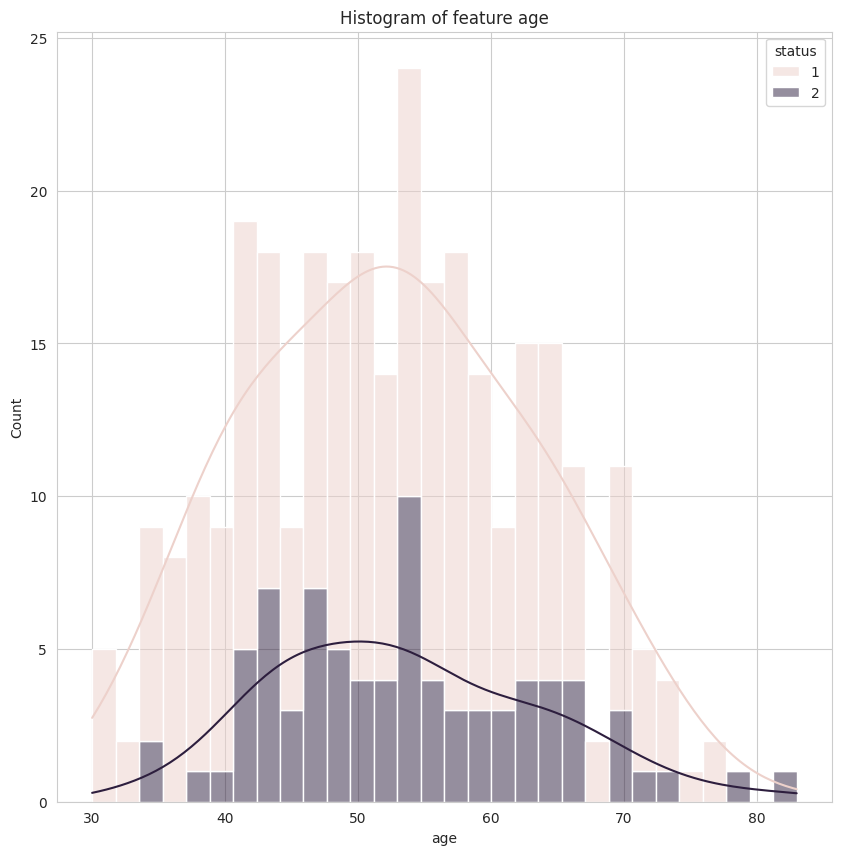

In [68]:
plt.figure(figsize=(10,10))
sns.histplot(data=dataframe, x='age', hue='status', bins=30, multiple='stack', kde=True)
plt.title('Histogram of feature age')
plt.show()

##### The above plot alone is not enough to make some conclusions, so lets perform few more operations.

In [69]:
# describe() function will give you count, mean, standard deviation, min and max values against each feature
dataframe.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


From the above table it is clear that,
1. mean of the age = 52(approx)
2. standard deviation/spread of the age = 11(approx)

By taking both the above observations into consideration, we can get to a conclusion that there are more number of datapoints from all the available datapoints is in range of 11 around the central tendency left and right. i.e., 41 to 63

This is obvious because, the chance of cancer is more in the elderly people rather than younger people.

To find out exact density of points in the range of 41 to 63 we need to perform some more operations.

In [70]:
# Density of the points between the age 41 and 63
print("Density of the points between the age 41 and 63 : {density}".format(density=dataframe[(dataframe['age']>=41) & (dataframe['age']<=63)].shape[0]/dataframe.shape[0]))
# Survival rate more than 5 years after the operation between the age group 41 and 63
print("Survival rate more than 5 years after the operation between the age group 41 and 63: {survival}".format(survival=dataframe[(dataframe['age']>=41) & (dataframe['age']<=63) & (dataframe['status']==1)].shape[0]/dataframe[(dataframe['age']>=41) & (dataframe['age']<=63)].shape[0]))
# Survival rate more than 5 years below the age group 40
print("Survival rate more than 5 years after the operation below age 40 : {survival}".format(survival=dataframe[(dataframe['age']<40) & (dataframe['status']==1)].shape[0]/dataframe[(dataframe['age']<40)].shape[0]))
# Survival rate more than 5 years above age group 60
print("Survival rate more than 5 years after the operation above age 60 : {survival}".format(survival=dataframe[(dataframe['age']>60) & (dataframe['status']==1)].shape[0]/dataframe[(dataframe['age']>60)].shape[0]))

Density of the points between the age 41 and 63 : 0.6862745098039216
Survival rate more than 5 years after the operation between the age group 41 and 63: 0.7047619047619048
Survival rate more than 5 years after the operation below age 40 : 0.9
Survival rate more than 5 years after the operation above age 60 : 0.7142857142857143


### Some conlcusions from the above operations
1. About 70 percentage of the data points are concentrated in between 41 and 63.
2. Survival rate of more than 5 years after the operation is higher in younger people and it is obvious as immune system of the younger people is good
3. Survival rate of more than 5 years is decreases as the age  increases.

Some ups and downs are seen here and there, this might be because of smaller dataset and imbalanced dataset

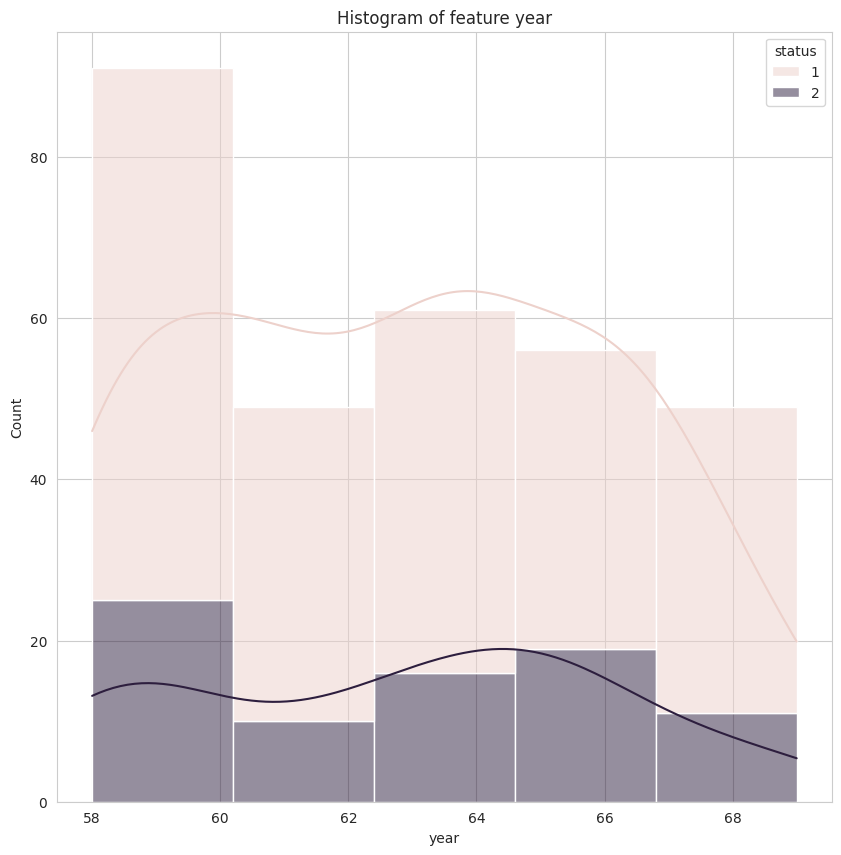

In [71]:
# Histogram of feature year
plt.figure(figsize=(10,10))
sns.histplot(data=dataframe, x='year', hue='status',bins=5, multiple='stack', kde=True)
plt.title('Histogram of feature year')
plt.show()

1. We cannot get into a any sort of conclusion from the above plot because consider an example, If we say that, the survival rate is more in between the years 1958 and 1961, this will contradictory if there are more younger people in between those years.
2. In this scenarios, the conclusions need to be made either doing some more operations like in the case of age or use Bi-variate analysis. For example, drawing scatter plot between age and year gives you some understanding of point 1 example.


In [72]:
print("The density of datapoints between the years 1958 and 1961 below age 40 : {survival}".format(survival=dataframe[(dataframe['year']>=58) & (dataframe['year']<=61) & (dataframe['age']<40)].shape[0]/dataframe[(dataframe['year']>=58) & (dataframe['year']<=61)].shape[0]))

The density of datapoints between the years 1958 and 1961 below age 40 : 0.1623931623931624


1. By combining the histogram and the above cell operation we can get into a conclusion that, survival rate more than 5 years is more between the years 1958 and 61. Survival rate is increasing as we get to the modern years.
2. The above is the technical point but practically speaking, the above thing should not be true because modern era of medication is grown to very great extent. But various factors should also consider like quality of food available in the older periods is more.

### Box plot or violin plots
These plots are very much useful to find central tendency(median), IQR and outliers of the data

<ipython-input-73-df0c8f7ffa1e>:3: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(data=dataframe[dataframe.columns[0:3]],


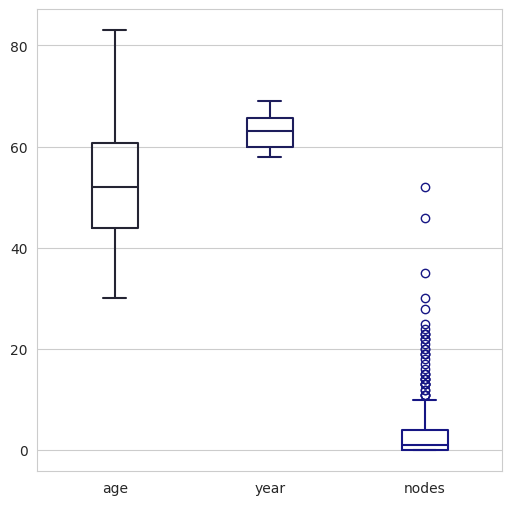

In [73]:
# Boxplot from seaborn
plt.figure(figsize=(6,6))
sns.boxplot(data=dataframe[dataframe.columns[0:3]],
            # x = 'status',
            # y = 'nodes',
            orient = None,
            # hue = dataframe.columns[3],
            fill=False,
            width = 0.3,
            palette = sns.color_palette("dark:b"))
# plt.ylim(-10.0,60)
# plt.yticks(np.arange(4,8,0.2))
plt.show()

We cannot get into any conclusion about nodes, lets draw histogram and check what is its distribution

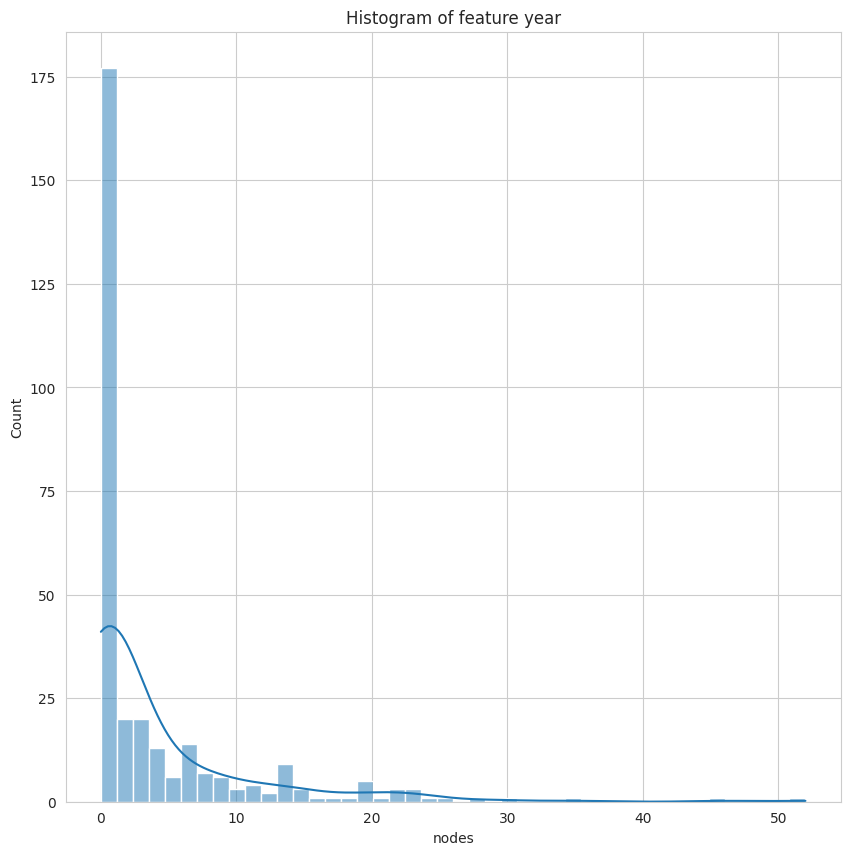

In [74]:
# Histogram of feature year
plt.figure(figsize=(10,10))
sns.histplot(data=dataframe, x='nodes', multiple='stack', kde=True)
plt.title('Histogram of feature year')
plt.show()

1. Yup! this is the reason why more number of points are outside the whiskers of boxplot. As there are more density points at number of nodes between 0 to 1 the median should be 1.
2. And if you see carefully it follows **pareto distribution** for which central tendency would be infinity.
3. The survival chance of prople whose auxillary lymph nodes are below 4 is greater.
4. As the number auxillary nodes increases, the survival rate also decreases.
5. As nodes increases, survival status = 2 has significant value compared to survival status = 1

### Observations
1. The samples(with survival status = 1) are mostly from age group between 35 and 65.
2. The density for the samples(with survival status = 2) are mostly from age group between 40 and 60.

### Bivariate analysis( Scatter plots, Pair plots, heatmap)


Looking at the conclusions we got from Univariate analysis, it looks like we dont require any further Bi variate analysis, but still lets draw pair plot and find out any relation between features

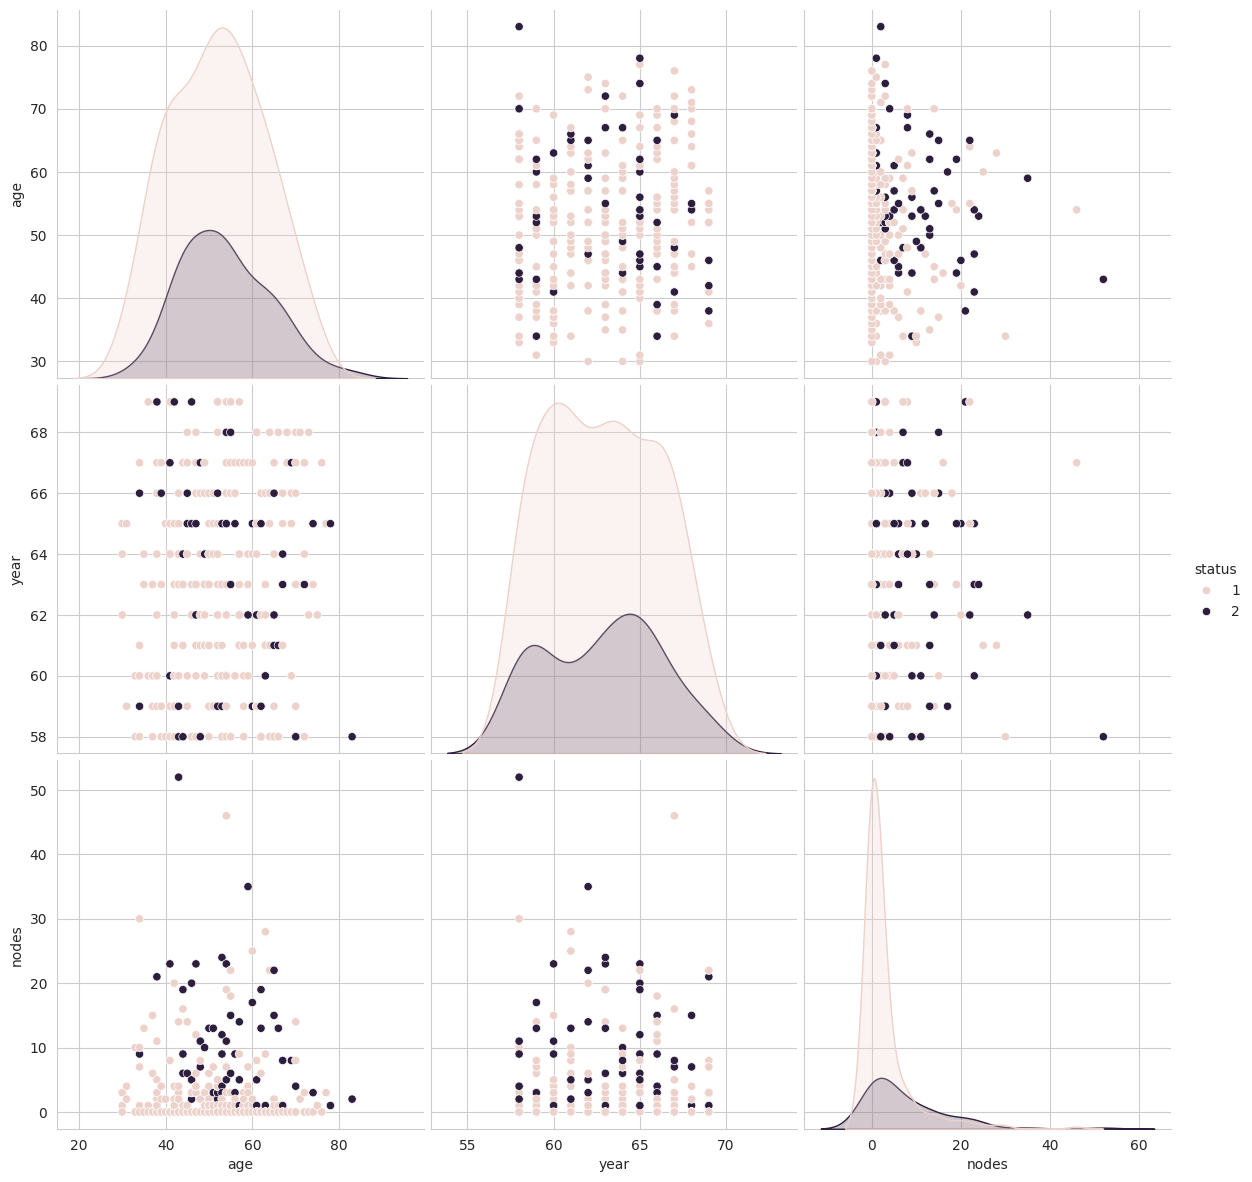

In [75]:
sns.set_style("whitegrid")
sns.pairplot(dataframe,hue='status',height=4)
plt.show()

Some conclusions from the above pairplot
1. If considered only nodes whatever be the other feature is fromm the available features, then the persons with less number of auxillary nodes has highest chance of survival more than 5 years. As the number of auxillary nodes increase the chance of survival more than 5 years is less. And it is obvious that, as there are more number of auxillary nodes, the cancer might have spread to many different places and caused much damage.
2. It is difficult to make any conclusions from age vs year plot. But one conclusion we can make is, less age more survival chance.

Drawing the correlation map might give us some idea about relation between features. So, lets draw heatmap

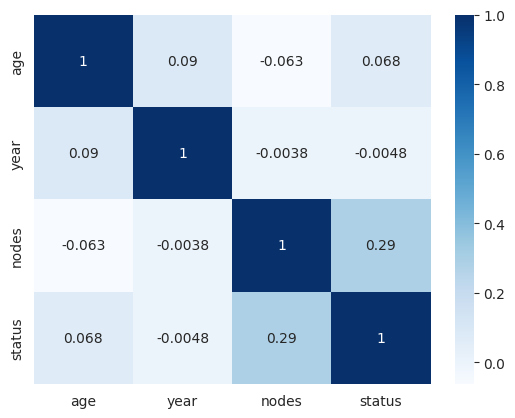

In [76]:
sns.heatmap(dataframe.corr(),annot=True,cmap='Blues')
plt.show()

1. Yup! this is the reason it is very hard to get any conclusions about relationship between features from pair plot. The given features are highly uncorrelated. It is very hard that, if one feature value increases/decreases the other feature value might increase/decrease.
2. For this kind of dataset decision trees might be the good choice.